In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, count, max, col

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Use car market Analysis").getOrCreate()

In [0]:
%fs ls 

path name size modificationTime dbfs:/FileStore/ FileStore/ 0 0 dbfs:/databricks-datasets/ databricks-datasets/ 0 0 dbfs:/databricks-results/ databricks-results/ 0 0 dbfs:/mnt/ mnt/ 0 0 dbfs:/user/ user/ 0 0

In [0]:
%fs ls 'dbfs:/FileStore/'

path name size modificationTime dbfs:/FileStore/tables/ tables/ 0 0

In [0]:
df=spark.read.csv("dbfs:/FileStore/tables/",header=True, inferSchema=True)

In [0]:
df.show()

+------------+------------+------------------+---------------+-----+------------------+---------+---------------+------------+----------+
|Manufacturer|     Varient|           Details|India Locations|Model|Distance Travelled|Fuel Type|Engine Capacity|Transmission|Price(INR)|
+------------+------------+------------------+---------------+-----+------------------+---------+---------------+------------+----------+
|      Nissan|       Sunny|              null|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual|    480000|
|       Honda|       Civic|VTi Automatic 1.6 |         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|   1040000|
|       Honda|       Civic|VTi Automatic 1.6 |         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|   1040000|
|       Honda|Civic Reborn|   VTi 1.8 i-VTEC |         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|   1900000|
|      Suzuki|      Cultus|       

In [0]:
df.dtypes

Out[36]: [('Manufacturer', 'string'),
 ('Varient', 'string'),
 ('Details', 'string'),
 ('India Locations', 'string'),
 ('Model', 'int'),
 ('Distance Travelled', 'int'),
 ('Fuel Type', 'string'),
 ('Engine Capacity', 'string'),
 ('Transmission', 'string'),
 ('Price(INR)', 'string')]

In [0]:
%fs ls '/FileStore/tables/'

path name size modificationTime dbfs:/FileStore/tables/Dataset_Used_Cars_.csv Dataset_Used_Cars_.csv 7214424 1723207006000 dbfs:/FileStore/tables/rootkey-1.csv rootkey-1.csv 99 1722849451000 dbfs:/FileStore/tables/rootkey.csv rootkey.csv 99 1722849028000

In [0]:

Used_car_df1 = spark.read.format("csv").option("header","true").option("inferschema","true").load("dbfs:/FileStore/tables/Dataset_Used_Cars_.csv")
Used_car_df1.take(5)

Out[23]: [Row(Manufacturer='Nissan', Varient='Sunny', Details=None, India Locations='Jaipur', Model=1987, Distance Travelled=1000000, Fuel Type='Petrol', Engine Capacity='0', Transmission='Manual', Price(INR)='480000'),
 Row(Manufacturer='Honda', Varient='Civic', Details='VTi Automatic 1.6 ', India Locations='Jaipur', Model=1996, Distance Travelled=223000, Fuel Type='Petrol', Engine Capacity='1600', Transmission='Automatic', Price(INR)='1040000'),
 Row(Manufacturer='Honda', Varient='Civic', Details='VTi Automatic 1.6 ', India Locations='Jaipur', Model=1996, Distance Travelled=223000, Fuel Type='Petrol', Engine Capacity='1600', Transmission='Automatic', Price(INR)='1040000'),
 Row(Manufacturer='Honda', Varient='Civic Reborn', Details='VTi 1.8 i-VTEC ', India Locations='Jaipur', Model=2007, Distance Travelled=212000, Fuel Type='Petrol', Engine Capacity='1800', Transmission='Manual', Price(INR)='1900000'),
 Row(Manufacturer='Suzuki', Varient='Cultus', Details='EURO II ', India Locations='

In [0]:
Used_car_df1.columns 

Out[24]: ['Manufacturer',
 'Varient',
 'Details',
 'India Locations',
 'Model',
 'Distance Travelled',
 'Fuel Type',
 'Engine Capacity',
 'Transmission',
 'Price(INR)']

In [0]:
Used_car_df1.dtypes

Out[25]: [('Manufacturer', 'string'),
 ('Varient', 'string'),
 ('Details', 'string'),
 ('India Locations', 'string'),
 ('Model', 'int'),
 ('Distance Travelled', 'int'),
 ('Fuel Type', 'string'),
 ('Engine Capacity', 'string'),
 ('Transmission', 'string'),
 ('Price(INR)', 'string')]

Preprocessing the data

Droping the detail column cuz it doesnt add any value

Handling the feture price by removing call attribute

In [0]:
NEW_DF1=Used_car_df1.drop(Used_car_df1.Details)

In [0]:
NEW_DF1.show()

+------------+------------+---------------+-----+------------------+---------+---------------+------------+----------+
|Manufacturer|     Varient|India Locations|Model|Distance Travelled|Fuel Type|Engine Capacity|Transmission|Price(INR)|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+----------+
|      Nissan|       Sunny|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual|    480000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|   1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|   1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|   1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|   1465000|
|      Toyota|        Vitz|         Jaipur| 2003


Filtering the data by removing call attribute from data table and renaming the columns

In [0]:
print(NEW_DF1.columns)

['Manufacturer', 'Varient', 'India Locations', 'Model', 'Distance Travelled', 'Fuel Type', 'Engine Capacity', 'Transmission', 'Price(INR)']


In [0]:
df_renamed = NEW_DF1.withColumnRenamed("Price(INR)", "Price")
df_renamed.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India Locations|Model|Distance Travelled|Fuel Type|Engine Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|      Nissan|       Sunny|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual| 480000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
+------------+------------+---------------+-----+------------------+----

In [0]:
df_renamed.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Varient: string (nullable = true)
 |-- India Locations: string (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Distance Travelled: integer (nullable = true)
 |-- Fuel Type: string (nullable = true)
 |-- Engine Capacity: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Price: string (nullable = true)



In [0]:
df_renamed.summary().show(5)

+-------+------------+---------+---------------+-----------------+------------------+---------+------------------+------------+-----------------+
|summary|Manufacturer|  Varient|India Locations|            Model|Distance Travelled|Fuel Type|   Engine Capacity|Transmission|            Price|
+-------+------------+---------+---------------+-----------------+------------------+---------+------------------+------------+-----------------+
|  count|       97123|    96636|          97123|            97123|             97123|    97123|             97123|       97123|            97123|
|   mean|        null|     null|           null|2013.146443170001| 85472.81550199231|     null|1427.7785036913476|         4.0| 4632504.19831646|
| stddev|        null|     null|           null|8.738125284975933| 85298.03178596968|     null|  809.979881577834|         0.0|7097152.914482029|
|    min|        Adam| Mini Bus|       Adilabad|             1944|                 1|      CNG|                 0|          

In [0]:
print(df_renamed.count())

97123


In [0]:
df_renamed = df_renamed.filter((df_renamed.Price != 'Call') )

In [0]:
df_renamed.show(20000)

+------------+------------------+------------------+-----+------------------+---------+---------------+------------+---------+
|Manufacturer|           Varient|   India Locations|Model|Distance Travelled|Fuel Type|Engine Capacity|Transmission|    Price|
+------------+------------------+------------------+-----+------------------+---------+---------------+------------+---------+
|      Nissan|             Sunny|            Jaipur| 1987|           1000000|   Petrol|              0|      Manual|   480000|
|       Honda|             Civic|            Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|  1040000|
|       Honda|             Civic|            Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|  1040000|
|       Honda|      Civic Reborn|            Jaipur| 2007|            212000|   Petrol|           1800|      Manual|  1900000|
|      Suzuki|            Cultus|            Jaipur| 2012|                 1|   Petrol|           1000|      Ma

In [0]:
df_renamed.count()

Out[43]: 94919

In [0]:
df_renamed.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India Locations|Model|Distance Travelled|Fuel Type|Engine Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|      Nissan|       Sunny|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual| 480000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
+------------+------------+---------------+-----+------------------+----

In [0]:
df_renamed2=df_renamed.withColumnRenamed("India Locations", "India_Locations")
df_renamed2.show(10)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance Travelled|Fuel Type|Engine Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|      Nissan|       Sunny|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual| 480000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
|      Toyota|        Vitz|         Jaipur| 2003|            240000|   P

In [0]:
df_renamed3=df_renamed2.withColumnRenamed("Fuel Type", "Fuel_Type")
df_renamed3.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance Travelled|Fuel_Type|Engine Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|      Nissan|       Sunny|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual| 480000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
+------------+------------+---------------+-----+------------------+----

In [0]:
df_renamed4=df_renamed3.withColumnRenamed("Engine Capacity", "Engine_Capacity")
df_renamed4.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance Travelled|Fuel_Type|Engine_Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|      Nissan|       Sunny|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual| 480000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
+------------+------------+---------------+-----+------------------+----

In [0]:
df_renamed5=df_renamed5.withColumnRenamed("Distance Travelled", "Distance_Travelled")
df_renamed5.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|      Nissan|       Sunny|         Jaipur| 1987|           1000000|   Petrol|              0|      Manual| 480000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
+------------+------------+---------------+-----+------------------+----

In [0]:
df_renamed5= df_renamed5.filter((df_renamed5.Engine_Capacity >=100 ) )

In [0]:
print(df_renamed5.count())

91452


In [0]:
df_renamed5.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Varient: string (nullable = true)
 |-- India_Locations: string (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Distance_Travelled: integer (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Engine_Capacity: string (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Price: string (nullable = true)



CHANGE THE DATA TYPE OF THE COLUMN 

In [0]:
df_type= df_renamed5.withColumn("Price",df_renamed5["Price"].cast('integer'))

In [0]:
df_type= df_type.withColumn("Engine_Capacity",df_type["Engine_Capacity"].cast('integer'))

In [0]:
df_type.dtypes

Out[57]: [('Manufacturer', 'string'),
 ('Varient', 'string'),
 ('India_Locations', 'string'),
 ('Model', 'int'),
 ('Distance_Travelled', 'int'),
 ('Fuel_Type', 'string'),
 ('Engine_Capacity', 'int'),
 ('Transmission', 'string'),
 ('Price', 'int')]

In [0]:
df_type.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Varient: string (nullable = true)
 |-- India_Locations: string (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Distance_Travelled: integer (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Engine_Capacity: integer (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Price: integer (nullable = true)



In [0]:
df_type.createOrReplaceTempView("Dataset_Used_Car")

In [0]:
spark.sql("SELECT * FROM Dataset_Used_Car WHERE `Engine_Capacity` > 600").show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
|      Toyota|        Vitz|         Jaipur| 2003|            240000|   Petrol|           1300|   Automatic|2500000|
+------------+------------+---------------+-----+------------------+----

FINDING NULL VALUES, EMPTY VALUES IN DATA SET

In [0]:
from pyspark.sql.functions import col,isnan,when,count

In [0]:
df_type.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_type.columns]
   ).show()

+------------+-------+---------------+-----+------------------+---------+---------------+------------+-----+
|Manufacturer|Varient|India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|Price|
+------------+-------+---------------+-----+------------------+---------+---------------+------------+-----+
|           0|    446|              0|    0|                 0|        0|              0|           0|    0|
+------------+-------+---------------+-----+------------------+---------+---------------+------------+-----+



In [0]:
df_type.count()

Out[68]: 91452

DROPING NULL VALUES

In [0]:
df_type.na.drop().show(truncate=False)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|Varient     |India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|Price  |
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Honda       |Civic       |Jaipur         |1996 |223000            |Petrol   |1600           |Automatic   |1040000|
|Honda       |Civic       |Jaipur         |1996 |223000            |Petrol   |1600           |Automatic   |1040000|
|Honda       |Civic Reborn|Jaipur         |2007 |212000            |Petrol   |1800           |Manual      |1900000|
|Suzuki      |Cultus      |Jaipur         |2012 |1                 |Petrol   |1000           |Manual      |1465000|
|Toyota      |Vitz        |Jaipur         |2003 |240000            |Petrol   |1300           |Automatic   |2500000|
|Honda       |Civic       |Jaipur         |1996 |223000            |Petr

In [0]:
df_type.count()

Out[73]: 91452

In [0]:
df_type = df_type.filter((df_type.Varient != ''))

In [0]:
df_type.count()

Out[75]: 91006

The null values are successfully removed

In [0]:
df_type.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_type.columns]
   ).show()

+------------+-------+---------------+-----+------------------+---------+---------------+------------+-----+
|Manufacturer|Varient|India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|Price|
+------------+-------+---------------+-----+------------------+---------+---------------+------------+-----+
|           0|      0|              0|    0|                 0|        0|              0|           0|    0|
+------------+-------+---------------+-----+------------------+---------+---------------+------------+-----+



Save the preprocessed file as a csv format or Saving This df_type data fram as csv for Aggregation of the data

In [0]:
output_path = "dbfs:/FileStore/tables/output1.csv"


In [0]:
df_type.coalesce(1).write.option("header", "true").csv(output_path)


This is standard file protocol format to download the csv file into your local file system

In [0]:
https://community.cloud.databricks.com/files/tables/output1.csv/part-00000-tid-5401256172231407252-cc6ea790-4f8d-4043-b968-43b8168cb69a-145-1-c000.csv?o=4099732601956923

In [0]:
%fs ls 'dbfs:/FileStore/tables'

path name size modificationTime dbfs:/FileStore/tables/Dataset_Used_Cars_.csv Dataset_Used_Cars_.csv 7214424 1723207006000 dbfs:/FileStore/tables/output.csv/ output.csv/ 0 0 dbfs:/FileStore/tables/rootkey-1.csv rootkey-1.csv 99 1722849451000 dbfs:/FileStore/tables/rootkey.csv rootkey.csv 99 1722849028000

In [0]:
df_new_file=spark.read.csv('dbfs:/FileStore/tables/output.csv/',header=True,inferSchema=True)

In [0]:
df_new_file.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
|      Toyota|        Vitz|         Jaipur| 2003|            240000|   Petrol|           1300|   Automatic|2500000|
+------------+------------+---------------+-----+------------------+----

In [0]:
display(df_type)

Manufacturer Varient India_Locations Model Distance_Travelled Fuel_Type Engine_Capacity Transmission Price Honda Civic Jaipur 1996 223000 Petrol 1600 Automatic 1040000 Honda Civic Jaipur 1996 223000 Petrol 1600 Automatic 1040000 Honda Civic Reborn Jaipur 2007 212000 Petrol 1800 Manual 1900000 Suzuki Cultus Jaipur 2012 1 Petrol 1000 Manual 1465000 Toyota Vitz Jaipur 2003 240000 Petrol 1300 Automatic 2500000 Honda Civic Jaipur 1996 223000 Petrol 1600 Automatic 1040000 Honda Civic Jaipur 1996 223000 Petrol 1600 Automatic 1040000 Toyota Corolla Jaipur 1994 100000 Petrol 1500 Automatic 1820000 Daihatsu Cuore Jaipur 2003 100000 Petrol 800 Manual 750000 Daihatsu Mira Jaipur 2012 60000 Petrol 660 Automatic 2500000 Nissan Juke Jaipur 2011 160000 Petrol 1500 Automatic 3300000 Mitsubishi Pajero Jaipur 1990 100000 Diesel 2500 Manual 950000 Suzuki Every Wagon Jaipur 2014 89654 Petrol 660 Automatic 2100000 Toyota Land Cruiser Jaipur 2003 125000 Diesel 4200 Automatic 8300000 Suzuki Alto Jaipur 2021 13000 Petrol 660 Manual 2520000 Suzuki Cultus Jaipur 2016 61000 Petrol 1000 Manual 1670000 Suzuki Mehran Jaipur 2009 135000 Petrol 800 Manual 760000 Toyota Prado Jaipur 2001 130000 Diesel 3000 Automatic 4950000 Toyota Prado Jaipur 2001 130000 Diesel 3000 Automatic 4950000 Suzuki Alto Jaipur 2019 116000 Petrol 660 Manual 2200000 Suzuki Mehran Jaipur 2010 70000 Petrol 800 Manual 830000 Suzuki Cultus Jaipur 2002 250000 CNG 1000 Manual 650000 Suzuki Alto Jaipur 2006 200000 Petrol 660 Automatic 1650000 Toyota Corolla Jaipur 2015 45000 Petrol 1300 Automatic 4250000 Honda Civic Jaipur 2001 100000 Petrol 1600 Automatic 1350000 Toyota Prado Jaipur 2001 130000 Diesel 3000 Automatic 4950000 Toyota Prado Jaipur 2001 130000 Diesel 3000 Automatic 4950000 Toyota Corolla Indus Jaipur 1999 180000 Diesel 2000 Manual 1260000 Toyota Yaris Jaipur 2020 60000 Petrol 1500 Automatic 4950000 Toyota Corolla Jaipur 1996 175000 Petrol 1300 Automatic 1580000 Honda BR-V Jaipur 2022 10000 Petrol 1500 Automatic 6000000 Toyota Corolla Jaipur 2007 140000 Petrol 1300 Manual 2600000 Honda Civic EK Jaipur 1997 100000 Petrol 1600 Manual 900000 Toyota Land Cruiser Jaipur 1996 60853 Diesel 2942 Automatic 3333000 Honda Civic Jaipur 2009 164000 Petrol 1300 Automatic 2900000 Suzuki Mehran Jaipur 2007 1 Petrol 800 Manual 700000 Honda City Jaipur 2010 149000 Petrol 1300 Manual 2500000 Honda City Jaipur 2010 149000 Petrol 1300 Manual 2500000 Toyota Rush Jaipur 2011 125000 Petrol 1500 Automatic 3450000 Toyota Corolla Jaipur 2015 141000 Petrol 1300 Automatic 3750000 Suzuki Wagon R Jaipur 2017 130000 Petrol 1000 Manual 1900000 Suzuki Bolan Jaipur 2011 100000 Petrol 800 Manual 1100000 Honda Civic Jaipur 2001 100000 Petrol 1600 Automatic 1350000 Honda Civic Jaipur 2007 170000 Petrol 1800 Manual 2100000 Changan Karvaan Jaipur 2020 40000 Petrol 999 Manual 2250000 Toyota Corolla Jaipur 1986 150000 Petrol 1600 Manual 580000 Toyota Vitz Jaipur 2012 12345 Petrol 1000 Automatic 2700000 Toyota Corolla Jaipur 2019 120000 Petrol 1300 Automatic 4650000 Toyota Prado Jaipur 2001 128000 Diesel 3000 Automatic 5750000 Suzuki Alto Jaipur 2019 45000 Petrol 660 Manual 1550000 Suzuki Mehran Jaipur 1991 1111 CNG 800 Manual 320000 Toyota Corolla Jaipur 2011 177000 Petrol 1300 Manual 2350000 Suzuki Wagon R Jaipur 2015 85000 Petrol 1000 Manual 1920000 Toyota Corolla Jaipur 2011 181220 Petrol 1300 Manual 2850000 Honda Civic Jaipur 2001 219000 Petrol 1600 Automatic 1250000 Suzuki Alto Jaipur 2021 27000 Petrol 660 Manual 2450000 Suzuki Mehran Jaipur 2001 220000 CNG 800 Manual 600000 Suzuki Mehran Jaipur 2011 8592 Petrol 800 Manual 750000 Suzuki Every Jaipur 2014 165899 Petrol 660 Automatic 1560000 FAW X-PV Jaipur 2017 69000 Petrol 1000 Manual 1150000 Toyota Vitz Jaipur 2003 200000 Petrol 1000 Automatic 1580000 Suzuki Cultus Jaipur 2021 22000 Petrol 1000 Manual 3550000 Toyota Passo Jaipur 2016 146000 Petrol 1000 Automatic 2550000 Toyota Vitz Jaipur 2006 110000 Petrol 1300 Automatic 2230000 Suzuki Mehran Jaipur 2010 100000 Pet

In [0]:
df_new_file.count()

Out[96]: 91006

In [0]:
%fs ls '/FileStore/tables/'

path name size modificationTime dbfs:/FileStore/tables/Dataset_Used_Cars_.csv Dataset_Used_Cars_.csv 7214424 1723207006000 dbfs:/FileStore/tables/output.csv/ output.csv/ 0 0 dbfs:/FileStore/tables/rootkey-1.csv rootkey-1.csv 99 1722849451000 dbfs:/FileStore/tables/rootkey.csv rootkey.csv 99 1722849028000

Aggregation of the data set using spark.sql and temp view 

Register the DataFrame as a temporary view

In [0]:
df_type.createOrReplaceTempView("cars")

In [0]:
df_type.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Varient: string (nullable = true)
 |-- India_Locations: string (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Distance_Travelled: integer (nullable = true)
 |-- Fuel_Type: string (nullable = true)
 |-- Engine_Capacity: integer (nullable = true)
 |-- Transmission: string (nullable = true)
 |-- Price: integer (nullable = true)



Avg price by car maker and its model

In [0]:
avg_price_df = spark.sql("""
    SELECT Manufacturer,Varient , round(AVG(Price)) AS average_price
    FROM cars
    GROUP BY Manufacturer, Varient
""")

In [0]:
avg_price_df.show()

+------------+---------------+-------------+
|Manufacturer|        Varient|average_price|
+------------+---------------+-------------+
|         KIA|        Picanto|    3172633.0|
|   Chevrolet|      Exclusive|     709103.0|
|    Cadillac|   Escalade Ext|        2.2E7|
|     Bentley|       Mulsanne|        1.2E8|
|        DFSK|          Glory|    5878823.0|
|    Daihatsu|          Copen|    3445938.0|
|         KIA|        Sorento|  1.0611667E7|
|      Nissan|         Pickup|    1100000.0|
|      Suzuki|       MR Wagon|    1881154.0|
|      Toyota|          Hiace|    5122593.0|
|    Daihatsu|     Move Latte|    2016250.0|
|  Mitsubishi|        Grandis|    2975000.0|
|       Honda|           Jade|    5287500.0|
|  Mitsubishi|       Ek Wagon|    2439706.0|
|        BAIC|             BJ|  1.0331897E7|
|     Hyundai|   Grand Starex|    7199000.0|
|      Toyota|          Hilux|   1.000434E7|
|      Toyota|    Prius Alpha|    5788643.0|
|        Jeep|             Cj|    1484286.0|
|       Ho

In [0]:
avg_price_df.count()

Out[84]: 483

In [0]:
avg_price=avg_price_df.write.saveAsTable('Avg_price')

In [0]:
type(avg_price)

Out[159]: NoneType

In [0]:
avg_price_df.createOrReplaceGlobalTempView("average_price_usecar_by_manufacture")

Count number of used cars make by the manufacturer


In [0]:
count_cars_df = spark.sql("""
    SELECT Manufacturer, COUNT(*) AS count_of_cars
    FROM cars
    GROUP BY Manufacturer
""")

In [0]:
count_cars_df.show(100)

+------------+-------------+
|Manufacturer|count_of_cars|
+------------+-------------+
|  Volkswagen|           29|
|       Lexus|          186|
|      Jaguar|           14|
|       Power|            6|
|        Jeep|          137|
|  Mitsubishi|         1219|
|      Prince|          201|
|   Chevrolet|          126|
|       Volvo|            2|
|       ZOTYE|            3|
|     Hyundai|         1832|
|     Changan|         1016|
|      Proton|          308|
|        Hino|            1|
|       Honda|        19696|
|        MINI|            8|
|   SsangYong|           15|
|        Audi|          404|
|         JAC|            9|
|      Austin|            2|
|      Daehan|           14|
|    Cadillac|            3|
|       Isuzu|           66|
|    Mercedes|          846|
|        Land|           45|
|        Roma|            1|
|      Master|            6|
|        Sogo|           21|
|     Mushtaq|            1|
|        BAIC|           88|
|      Daewoo|           74|
|       Tesla|

In [0]:
count_cars_df.createOrReplaceGlobalTempView("number_of_cars_by_brand")

Maximum distance traveled by the used cars depend on the car manufacturer

In [0]:
max_distance= spark.sql("""
    SELECT Manufacturer ,Varient, MAX(Distance_Travelled) AS max_distance_traveled
    FROM cars
    GROUP BY Manufacturer,Varient
    ORDER BY max_distance_traveled DESC
""")

In [0]:
max_distance.show()

+------------+------------+---------------------+
|Manufacturer|     Varient|max_distance_traveled|
+------------+------------+---------------------+
|       Honda|       Civic|              1000000|
|      Suzuki|      Mehran|              1000000|
|      Suzuki|          FX|              1000000|
|       Mazda|       Titan|              1000000|
|  Mitsubishi|      Lancer|              1000000|
|      Toyota|       Hilux|              1000000|
|      Suzuki|      Cultus|              1000000|
|      Suzuki|      Khyber|              1000000|
|      Toyota|       Belta|              1000000|
|      Suzuki|    Margalla|              1000000|
|      Daewoo|       Racer|              1000000|
|        Jeep|          CJ|              1000000|
|      Prince|           K|              1000000|
|      Nissan|       Sunny|              1000000|
|      Suzuki|         APV|              1000000|
|      Toyota|        Vitz|              1000000|
|      Toyota|Land Cruiser|              1000000|


In [0]:
max_distance.createOrReplaceGlobalTempView("maximum_distance_travelled_cars")

Maximum used cars in india  region wise

In [0]:
max_cars_df= spark.sql("""
    SELECT India_Locations ,COUNT(*) AS total_listing
    FROM cars
    GROUP BY India_Locations
    ORDER BY total_listing DESC
""")

In [0]:
max_cars_df.show()

+---------------+-------------+
|India_Locations|total_listing|
+---------------+-------------+
|          Delhi|        21622|
|         Mumbai|        17448|
|    Mahbubnagar|        14214|
|       Kolkata |         6242|
|          Ladnu|         3861|
|      Bangalore|         3219|
|       Chennai |         2741|
|      Hyderabad|         2318|
|       Viramgam|         1459|
|      Suratgarh|          925|
|         Jaipur|          807|
|     Ahmedabad |          790|
|    Vasai-Virar|          738|
|         Washim|          694|
|        Nandyal|          691|
|       Laharpur|          620|
|         Petlad|          581|
|      Sangamner|          403|
|       Palanpur|          387|
|         Guntur|          369|
+---------------+-------------+
only showing top 20 rows



In [0]:
max_cars_df.createOrReplaceGlobalTempView("Maximum_used_cars_india_location_wise")

Most Used cars Model Wise in Specific Indian Location

In [0]:
max_cars_Model_df = spark.sql("""
    SELECT Manufacturer, Varient,India_Locations, COUNT(*) AS Most_used_varient
    FROM cars
    GROUP BY Manufacturer, Varient , India_Locations
    ORDER BY Most_used_varient DESC
""").show(1000)

+------------+------------------+-----------------+-----------------+
|Manufacturer|           Varient|  India_Locations|Most_used_varient|
+------------+------------------+-----------------+-----------------+
|      Toyota|           Corolla|            Delhi|             2404|
|      Toyota|           Corolla|           Mumbai|             2234|
|       Honda|             Civic|            Delhi|             2129|
|      Toyota|           Corolla|      Mahbubnagar|             1799|
|       Honda|              City|            Delhi|             1749|
|       Honda|             Civic|      Mahbubnagar|             1410|
|       Honda|             Civic|           Mumbai|             1170|
|      Suzuki|              Alto|           Mumbai|             1119|
|      Suzuki|            Cultus|           Mumbai|             1060|
|      Suzuki|            Cultus|            Delhi|             1034|
|       Honda|              City|           Mumbai|              912|
|       Honda|      

Prefered transmission of the car in indian_location

In [0]:
transmission_cars_df = spark.sql("""
    SELECT India_Locations ,Transmission, COUNT(*) AS transmission
    FROM cars
    GROUP BY Transmission , India_Locations
    ORDER BY transmission DESC
""")

In [0]:
transmission_cars_df.show()

+---------------+------------+------------+
|India_Locations|Transmission|transmission|
+---------------+------------+------------+
|           Agra|      Manual|          59|
|       Rajampet|      Manual|          11|
|          Alwar|      Manual|           6|
|       Tirupati|      Manual|           4|
|     Malappuram|      Manual|           3|
|           Bhuj|      Manual|          21|
|         Nagaur|      Manual|           5|
|         Nagina|      Manual|           5|
|         Nadiad|      Manual|           1|
|      Nizamabad|      Manual|           1|
|     Coimbatore|      Manual|           6|
|          Kochi|      Manual|           9|
|     Raayachuru|      Manual|           2|
|          Akola|      Manual|           5|
|        Sitapur|      Manual|          13|
|      Kozhikode|      Manual|           9|
|         Meerut|      Manual|           8|
|         Mysore|      Manual|           3|
|        Bikaner|      Manual|           4|
|         Barmer|      Manual|  

In [0]:
transmission_cars_df.createOrReplaceGlobalTempView("Prefered_transmission_of_car")

AVERAGE PRICE OF CARS OVER THE YEARS 

In [0]:
AVG_Price_cars_df = spark.sql("""
    SELECT Manufacturer, Varient , Model ,   round(avg(Price)) AS AVG_price ,CAST( AVG_price AS DECIMAL(10, 2)) AS actual_Avg_price
    FROM cars
    GROUP BY Manufacturer , Model ,Varient
    ORDER BY Manufacturer  ASC
""")

In [0]:
AVG_Price_cars_df.show()

+------------+-----------+-----+-----------+----------------+
|Manufacturer|    Varient|Model|  AVG_price|actual_Avg_price|
+------------+-----------+-----+-----------+----------------+
|        Adam|       Revo| 2006|   372500.0|       372500.00|
|        Adam|       Revo| 2018|  9500000.0|      9500000.00|
|        Adam|       Revo| 2021|    1.275E7|     12750000.00|
|        Adam|       Revo| 2005|   580000.0|       580000.00|
|        Adam|       Revo| 2016|  8200000.0|      8200000.00|
|        Adam|       Revo| 2010|  5500000.0|      5500000.00|
|        Alfa|Romeo Other| 1989|   350000.0|       350000.00|
|        Audi|          Q| 2012|    1.175E7|     11750000.00|
|        Audi|          A| 2009|  5112500.0|      5112500.00|
|        Audi|          Q| 2011|      1.0E7|     10000000.00|
|        Audi|          A| 2019|1.6188136E7|     16188136.00|
|        Audi|          A| 2010|  4500000.0|      4500000.00|
|        Audi|          A| 2015|  9214043.0|      9214043.00|
|       

In [0]:
AVG_Price_cars_df.createOrReplaceGlobalTempView("Avg_price_of_car_change_yearwise")

INDIAN LOCATION WISE AVG PRICES OF CAR 


In [0]:
Location_cars_df = spark.sql("""
    SELECT India_Locations, Manufacturer  ,  Varient, round(avg(Price)) AS AVG_price ,CAST( AVG_price AS DECIMAL(10, 2)) AS actual_Avg_price
    FROM cars
    GROUP BY India_Locations, Manufacturer  ,  Varient
    ORDER BY  India_Locations  ASC
""").show(5)

+---------------+------------+-------+---------+----------------+
|India_Locations|Manufacturer|Varient|AVG_price|actual_Avg_price|
+---------------+------------+-------+---------+----------------+
|       Adilabad|     Hyundai| Santro|1050000.0|      1050000.00|
|       Adilabad|      Suzuki|  Swift|3776667.0|      3776667.00|
|       Adilabad|      Suzuki| Mehran| 750000.0|       750000.00|
|       Adilabad|   Chevrolet|  Optra|1500000.0|      1500000.00|
|       Adilabad|     Changan|Karvaan|2375000.0|      2375000.00|
+---------------+------------+-------+---------+----------------+
only showing top 5 rows



WE USE JOIN QUERY FOR ANALYSIS OF CREATED TABLES

Price of cars based on distance travelled


In [0]:
spark.sql("""select p.Manufacturer , p.Varient , p.average_price, m.max_distance_traveled 
          from global_temp.average_price_usecar_by_manufacture p join global_temp.maximum_distance_travelled_cars m 
          on p.Varient = m.Varient
          order by  m.max_distance_traveled
          """).show(10000)

+------------+-------------------+-------------+---------------------+
|Manufacturer|            Varient|average_price|max_distance_traveled|
+------------+-------------------+-------------+---------------------+
|      Datsun|             Cherry|     670000.0|                    1|
|     Hyundai|               Pony|    1200000.0|                    1|
|         BMW|                  i|      1.075E8|                    1|
|       Honda|               Cr X|    3550000.0|                   14|
|  Mitsubishi|               FUSO|    7400000.0|                   90|
|       Mazda|                 RX|    3741447.0|                  123|
|          MG|                 RX|    2980000.0|                  123|
|        Ford|              Other|    2137857.0|                 1212|
|      Nissan|              Other|    3500000.0|                 1212|
|     Hyundai|              Other|     876667.0|                 1212|
|       Volvo|              Other|     500000.0|                 1212|
|     

Visualization Using MATPLOTLIB

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
df_type.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
|      Toyota|        Vitz|         Jaipur| 2003|            240000|   Petrol|           1300|   Automatic|2500000|
+------------+------------+---------------+-----+------------------+----

TOP 20 MANUFACTURER IN USED CARS

In [0]:
from pyspark.sql import functions as F 
import matplotlib.pyplot as plt
import seaborn as sns


Get the top 20 manufacturers by count

In [0]:

top_20_manufacturers_df = df_type.groupBy("Manufacturer").count().orderBy(F.desc("count")).limit(20)

In [0]:
top_20_manufacturers_df.show(5)

+------------+-----+
|Manufacturer|count|
+------------+-----+
|      Toyota|30761|
|      Suzuki|23518|
|       Honda|19696|
|    Daihatsu| 3811|
|         KIA| 2245|
+------------+-----+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import col
df_grouped = df_type.groupBy("Manufacturer").count().orderBy(col("count").desc()).limit(20)
df_ordered.show()

+------------+-----+
|Manufacturer|count|
+------------+-----+
|      Toyota|30761|
|      Suzuki|23518|
|       Honda|19696|
|    Daihatsu| 3811|
|         KIA| 2245|
|      Nissan| 1885|
|     Hyundai| 1832|
|  Mitsubishi| 1219|
|     Changan| 1016|
|    Mercedes|  846|
|          MG|  698|
|        Audi|  404|
|      Proton|  308|
|         FAW|  277|
|        DFSK|  272|
|       Haval|  249|
|       Mazda|  216|
|      Prince|  201|
|       Lexus|  186|
|        Jeep|  137|
+------------+-----+



In [0]:
top_20_manufacturers_df.show()

+------------+-----+
|Manufacturer|count|
+------------+-----+
|      Toyota|30761|
|      Suzuki|23518|
|       Honda|19696|
|    Daihatsu| 3811|
|         KIA| 2245|
|      Nissan| 1885|
|     Hyundai| 1832|
|  Mitsubishi| 1219|
|     Changan| 1016|
|    Mercedes|  846|
|          MG|  698|
|        Audi|  404|
|      Proton|  308|
|         FAW|  277|
|        DFSK|  272|
|       Haval|  249|
|       Mazda|  216|
|      Prince|  201|
|       Lexus|  186|
|        Jeep|  137|
+------------+-----+



In [0]:
top_20_manufacturers = [row["Manufacturer"] for row in top_20_manufacturers_df.collect()]
print(top_20_manufacturers)

['Toyota', 'Suzuki', 'Honda', 'Daihatsu', 'KIA', 'Nissan', 'Hyundai', 'Mitsubishi', 'Changan', 'Mercedes', 'MG', 'Audi', 'Proton', 'FAW', 'DFSK', 'Haval', 'Mazda', 'Prince', 'Lexus', 'Jeep']


In [0]:
filtered_df = df_type.filter(df_type.Manufacturer.isin(top_20_manufacturers))
filtered_df.show(5)

+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|Manufacturer|     Varient|India_Locations|Model|Distance_Travelled|Fuel_Type|Engine_Capacity|Transmission|  Price|
+------------+------------+---------------+-----+------------------+---------+---------------+------------+-------+
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|       Civic|         Jaipur| 1996|            223000|   Petrol|           1600|   Automatic|1040000|
|       Honda|Civic Reborn|         Jaipur| 2007|            212000|   Petrol|           1800|      Manual|1900000|
|      Suzuki|      Cultus|         Jaipur| 2012|                 1|   Petrol|           1000|      Manual|1465000|
|      Toyota|        Vitz|         Jaipur| 2003|            240000|   Petrol|           1300|   Automatic|2500000|
+------------+------------+---------------+-----+------------------+----

Graph of number of cars by top 20 manufacturers
(BAR GARPH)

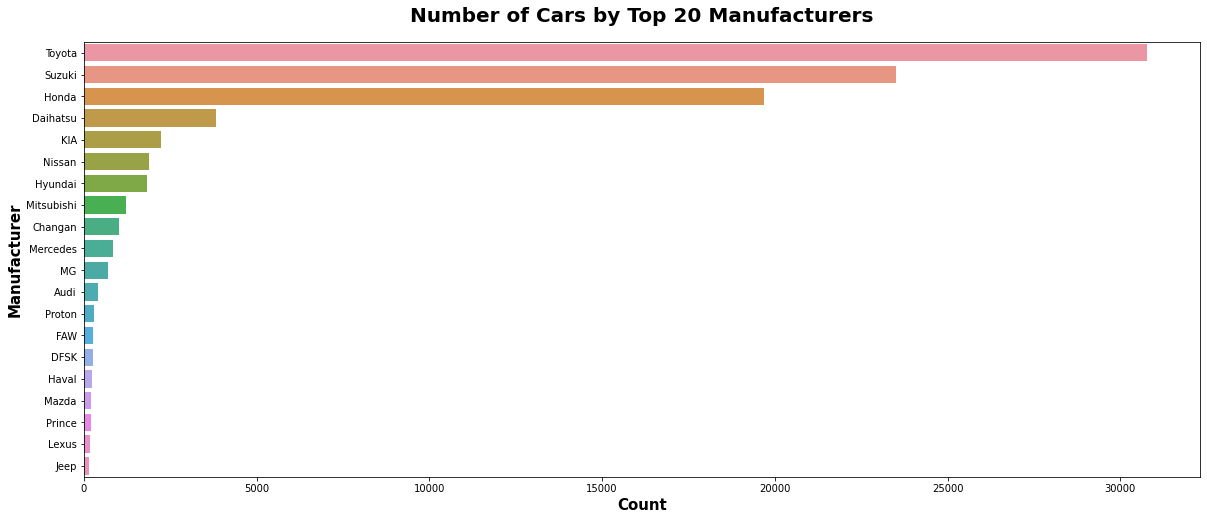

In [0]:
filtered_df_pd = filtered_df.toPandas()
plt.figure(figsize=(20, 8))
sns.countplot(data=filtered_df_pd, y='Manufacturer', order=top_20_manufacturers)
plt.title('Number of Cars by Top 20 Manufacturers',weight='bold',fontsize=20,pad=20)
plt.xlabel('Count',weight='bold',fontsize=15)
plt.ylabel('Manufacturer',weight='bold',fontsize=15)
plt.show()

Convert the pyspark dataframe into pandas dataframe

In [0]:
df_pd1=df_type.toPandas()

In [0]:
df_pd1.head()

Manufacturer 
 Varient 
 India_Locations 
 Model 
 Distance_Travelled 
 Fuel_Type 
 Engine_Capacity 
 Transmission 
 Price 
 
 
 
 
 0 
 Honda 
 Civic 
 Jaipur 
 1996 
 223000 
 Petrol 
 1600 
 Automatic 
 1040000 
 
 
 1 
 Honda 
 Civic 
 Jaipur 
 1996 
 223000 
 Petrol 
 1600 
 Automatic 
 1040000 
 
 
 2 
 Honda 
 Civic Reborn 
 Jaipur 
 2007 
 212000 
 Petrol 
 1800 
 Manual 
 1900000 
 
 
 3 
 Suzuki 
 Cultus 
 Jaipur 
 2012 
 1 
 Petrol 
 1000 
 Manual 
 1465000 
 
 
 4 
 Toyota 
 Vitz 
 Jaipur 
 2003 
 240000 
 Petrol 
 1300 
 Automatic 
 2500000

DISTANCE IMPACT ON CAR PRICE 

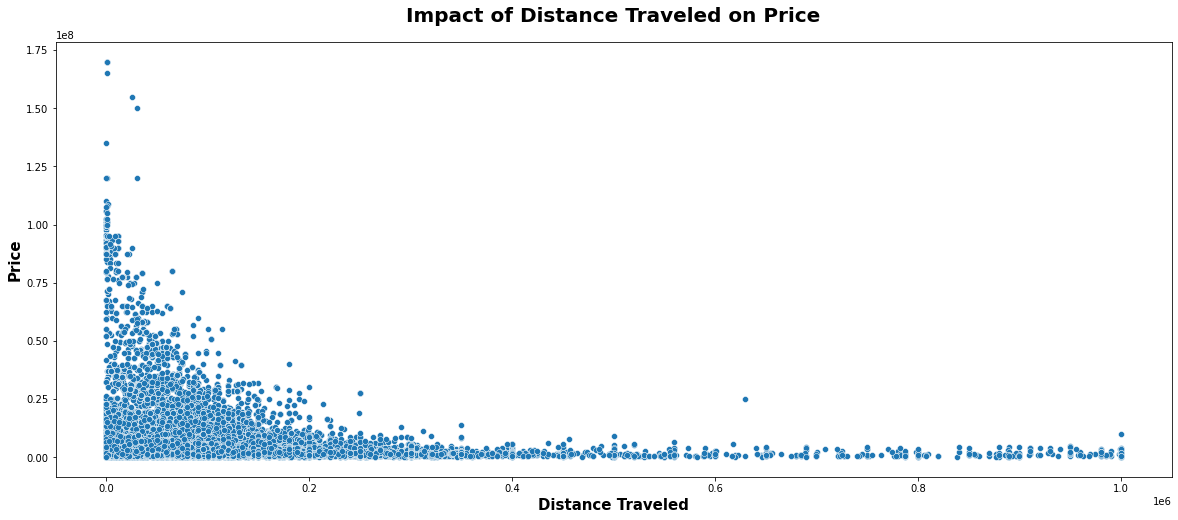

In [0]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df_pd1, x='Distance_Travelled', y='Price')
plt.title('Impact of Distance Traveled on Price',weight='bold',fontsize=20,pad=20)
plt.xlabel('Distance Traveled',weight='bold',fontsize=15)
plt.ylabel('Price',weight='bold',fontsize=15)
plt.show()


AVERAGE PRICE BASED ON MANUFACTURER

In [0]:
avg_prices = df_pd1.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

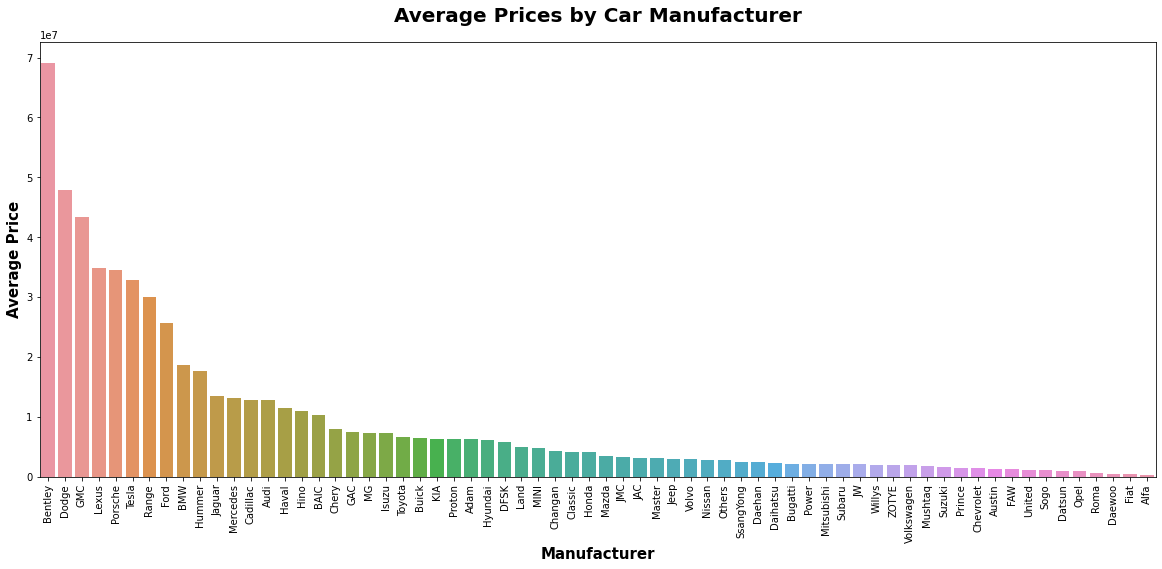

In [0]:
plt.figure(figsize=(20, 8))
sns.barplot(x=avg_prices.index, y=avg_prices.values)
plt.title('Average Prices by Car Manufacturer',weight='bold',fontsize=20,pad=20)
plt.xlabel('Manufacturer',weight='bold',fontsize=15)
plt.ylabel('Average Price',weight='bold',fontsize=15)
plt.xticks(rotation=90)
plt.show()

AVG PRICE BASED ON MAKER, MODEL AND MANUFACTURER

In [0]:
avg_data = df_pd1.groupby(['Manufacturer', 'Model']).agg({'Price': 'mean', 'Distance_Travelled': 'mean'}).reset_index()

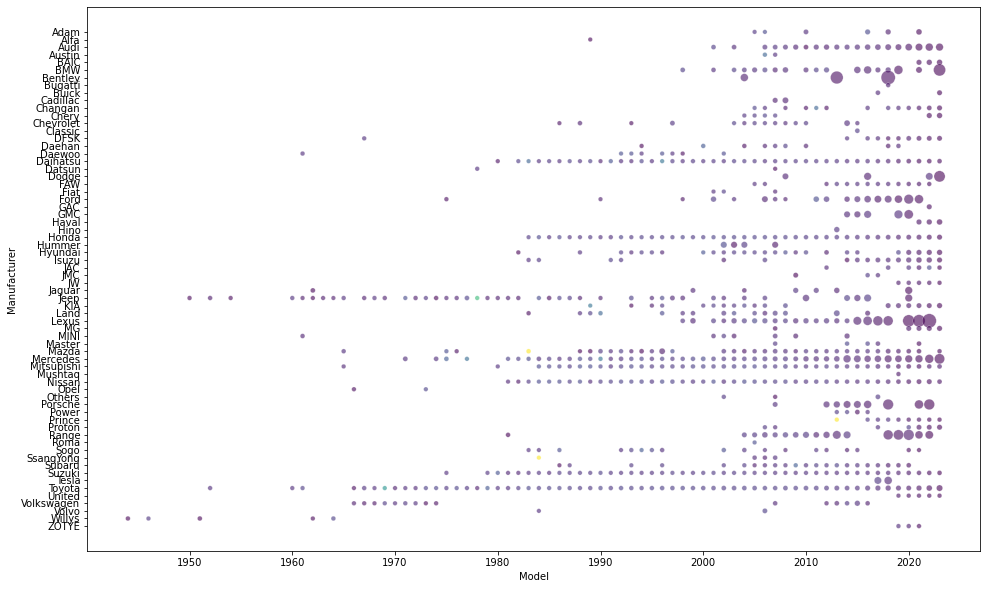

In [0]:
plt.figure(figsize=(16, 10))
bubble_plot = sns.scatterplot(data=avg_data, y='Manufacturer', x='Model', size='Price', hue='Distance_Travelled', sizes=(20, 200), alpha=0.6, palette='viridis', legend=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


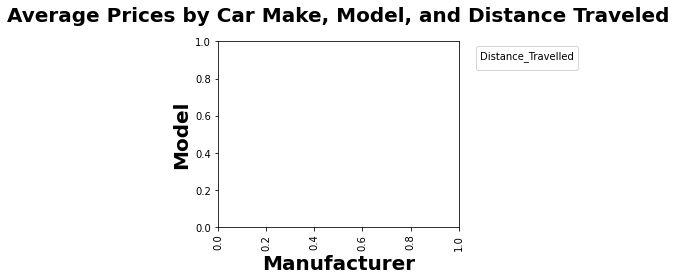

In [0]:
plt.title('Average Prices by Car Make, Model, and Distance Traveled',weight='bold',fontsize=20,pad=20)
plt.xlabel('Manufacturer',weight='bold',fontsize=20)
plt.ylabel('Model',weight='bold',fontsize=20)
plt.xticks(rotation=90)
plt.legend(title='Distance_Travelled', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Display the plot
plt.show()

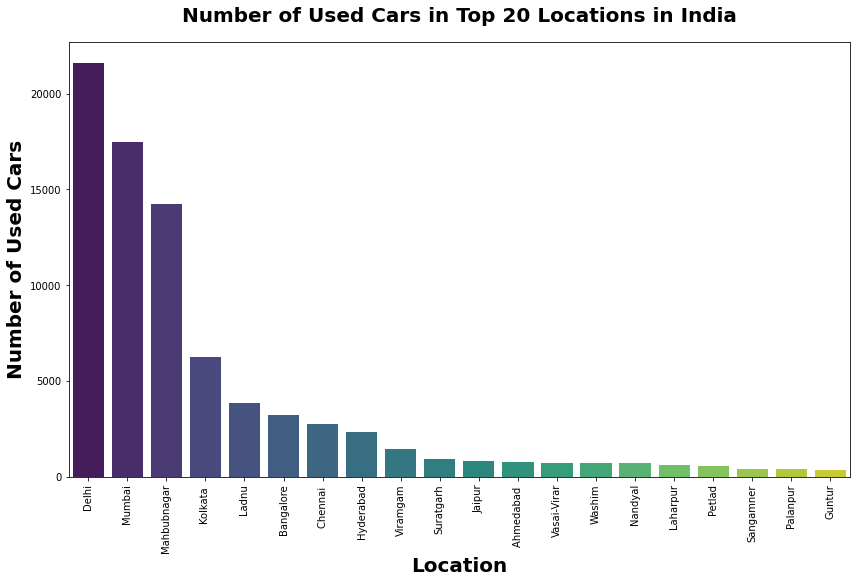

In [0]:
# Calculate the number of used cars by location
location_counts = df_pd1['India_Locations'].value_counts()

# Select the top 20 locations by count
top_20_locations = location_counts.head(20)

# Plot the number of used cars in these top 20 locations
plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_locations.index, y=top_20_locations.values, palette='viridis')
plt.title('Number of Used Cars in Top 20 Locations in India',weight='bold',fontsize=20,pad=20)
plt.xlabel('Location',weight='bold',fontsize=20)
plt.ylabel('Number of Used Cars',weight='bold',fontsize=20)
plt.xticks(rotation=90)
plt.show()

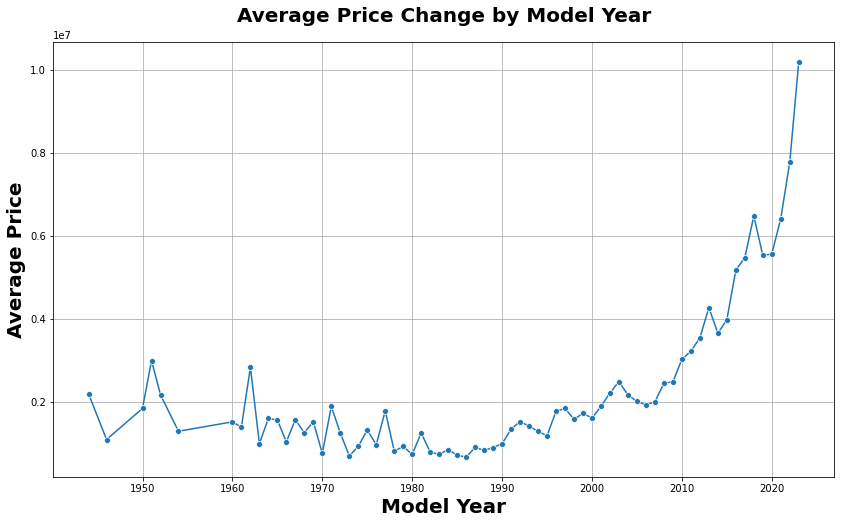

In [0]:
# Calculate the average price by model year
avg_price_by_year = df_pd1.groupby('Model')['Price'].mean().reset_index()

# Plot the average price change by model year
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_price_by_year, x='Model', y='Price', marker='o')
plt.title('Average Price Change by Model Year',weight='bold',fontsize=20,pad=20)
plt.xlabel('Model Year',weight='bold',fontsize=20)
plt.ylabel('Average Price',weight='bold',fontsize=20)
plt.grid(True)
plt.show()


In [0]:
# Group by Model and count occurrences, then order by count and take the top 10
top_10_models_df = df_type.groupBy("Model").count().orderBy(F.desc("count")).limit(10)

# Convert the top 10 models DataFrame to a Pandas DataFrame
top_10_models_pd = top_10_models_df.toPandas()
top_10_models_df.head(10)

Out[277]: [Row(Model=2021, count=7959),
 Row(Model=2022, count=7506),
 Row(Model=2018, count=6600),
 Row(Model=2017, count=5469),
 Row(Model=2020, count=5219),
 Row(Model=2019, count=5163),
 Row(Model=2016, count=4115),
 Row(Model=2015, count=4052),
 Row(Model=2014, count=3768),
 Row(Model=2007, count=3506)]

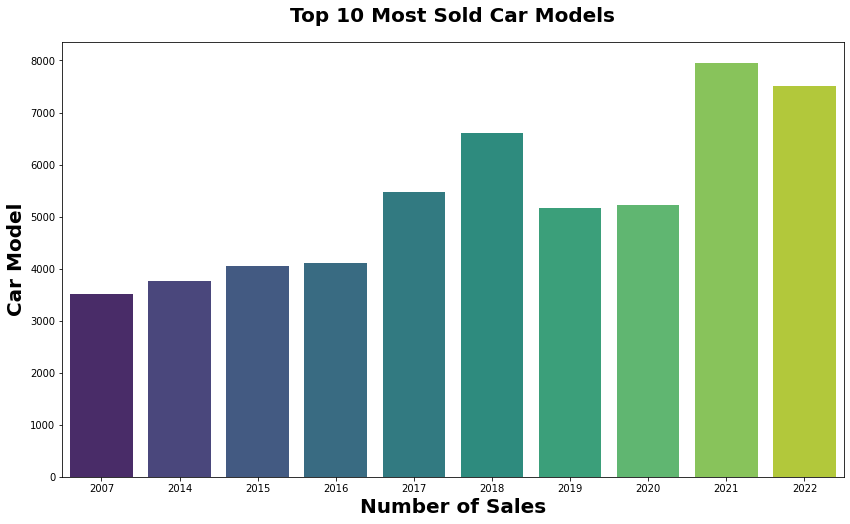

In [0]:
# Plot the top 10 most sold car models
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_models_pd, y='count', x='Model', palette='viridis')
plt.title('Top 10 Most Sold Car Models',weight='bold',fontsize=20,pad=20)
plt.xlabel('Number of Sales',weight='bold',fontsize=20)
plt.ylabel('Car Model',weight='bold',fontsize=20)
plt.show()